In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('medical_examination.csv')

# Preview the data
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# Add 'overweight' column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns='BMI', inplace=True)  # Remove BMI if not needed


In [ ]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)


In [3]:
df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)


In [4]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()


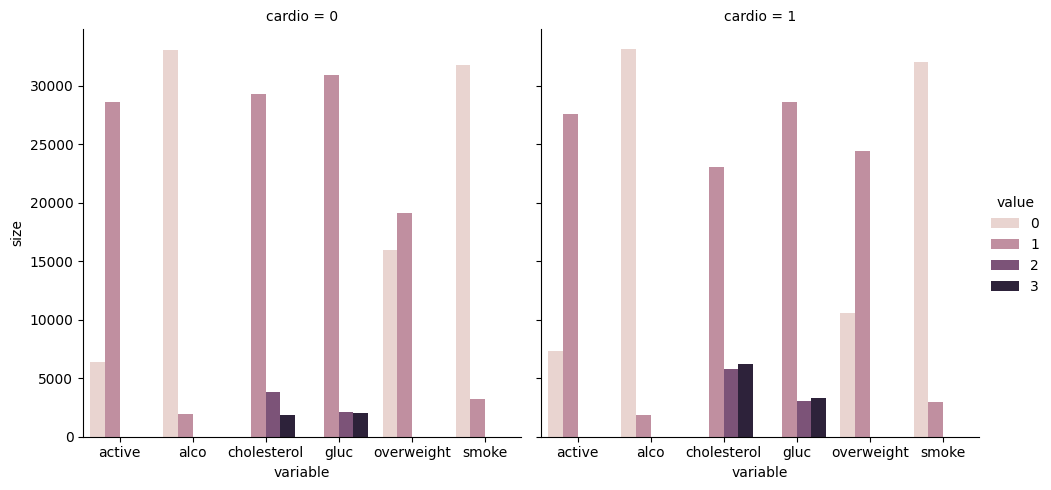

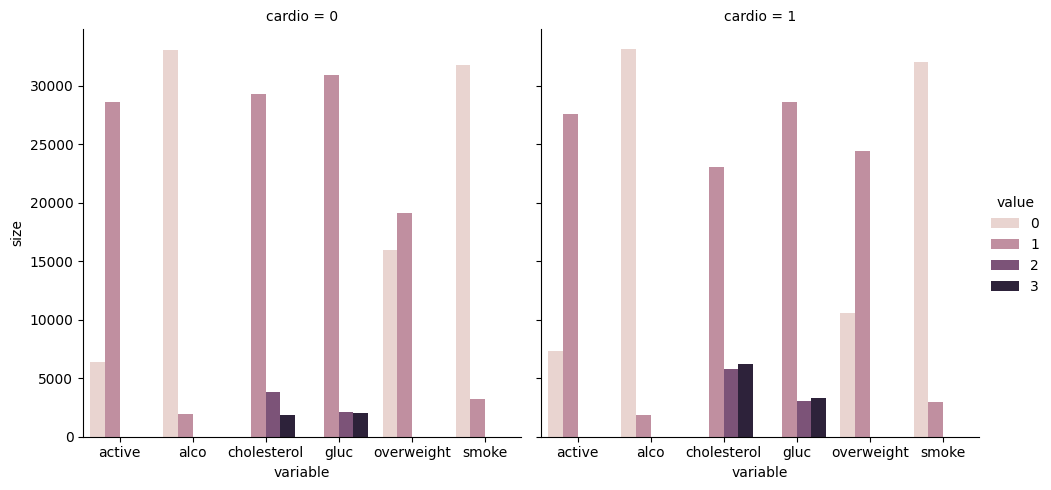

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cat_plot():
    fig = sns.catplot(
        data=df_cat,
        kind='bar',
        x='variable',
        y='size',
        hue='value',
        col='cardio'
    ).fig

    return fig

draw_cat_plot()


In [11]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]


In [9]:
import numpy as np

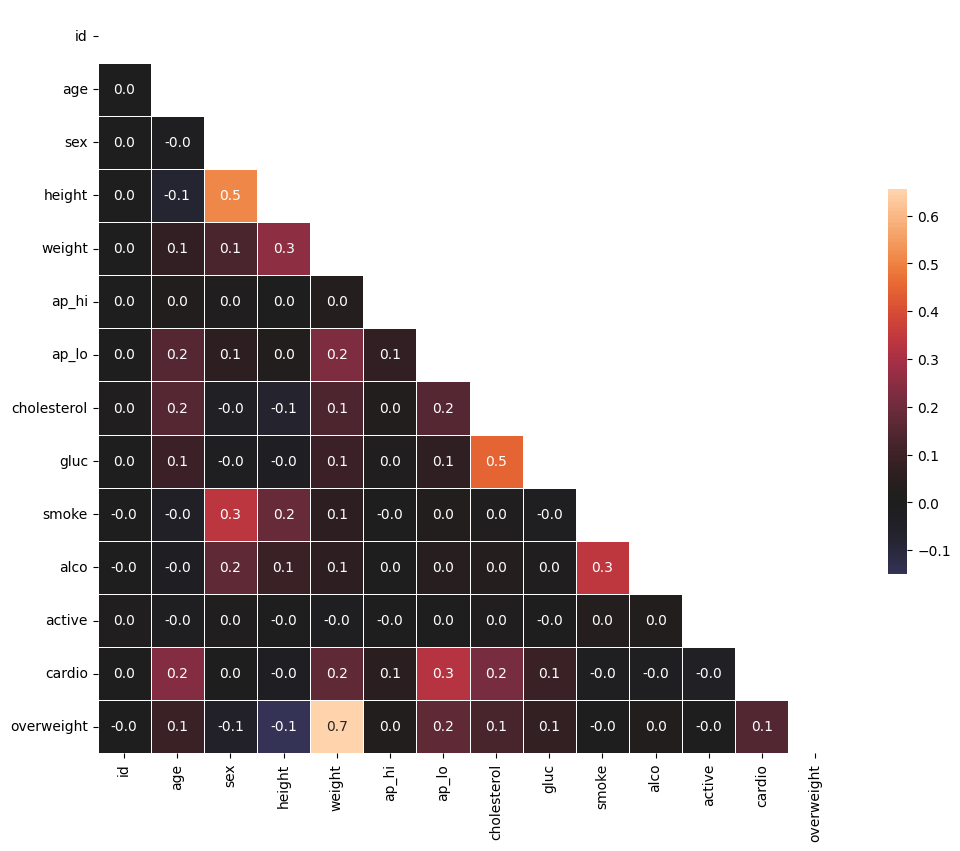

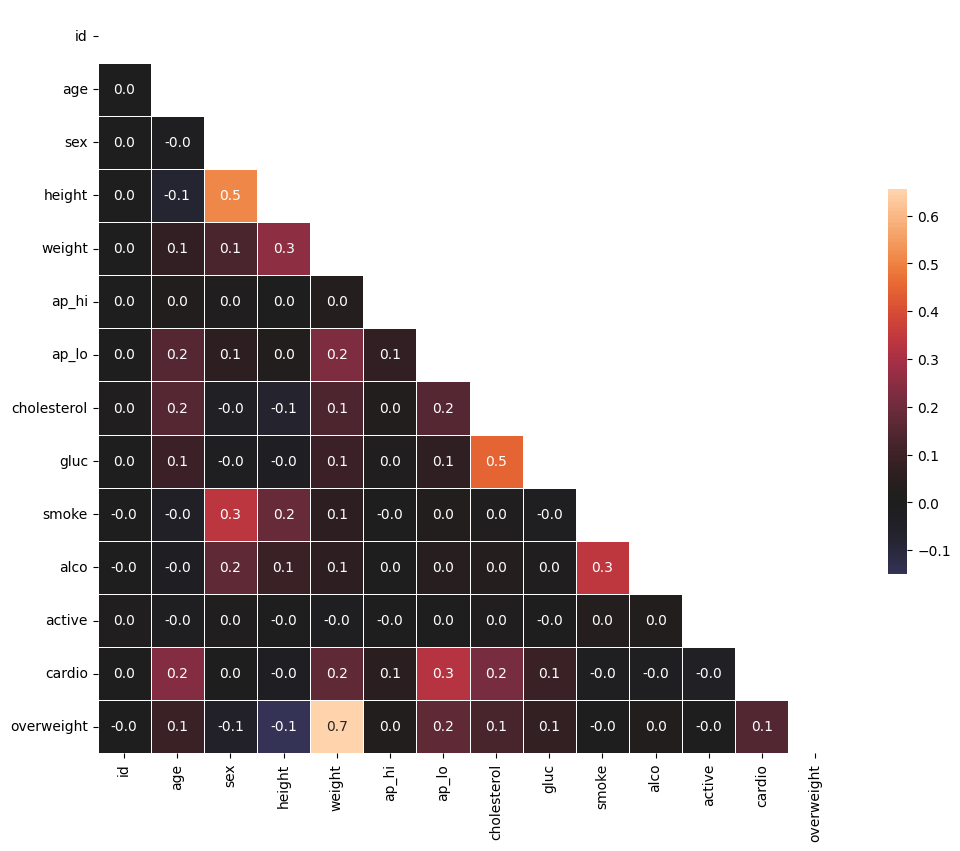

In [12]:
import numpy as np

def draw_heat_map():
    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt='.1f',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={'shrink': 0.5},
        ax=ax
    )
    return fig

draw_heat_map()
